# Fit the DDM on hierarchical data

In [1]:
import rlssm
import pandas as pd
import os

## Import the data

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1,1,43,39,2,1,1,1.244082,0
1,1,1,2,60,50,4,3,1,1.101821,1
2,1,1,3,44,36,4,2,2,1.029923,0
3,1,1,4,55,55,4,3,2,1.368007,0
4,1,1,5,52,49,4,3,3,1.039329,1


## Initialize the model

In [3]:
model = rlssm.DDModel(hierarchical_levels = 2)

Using cached StanModel


## Fit

In [4]:
# sampling parameters
n_iter = 3000
n_warmup = 1000
n_chains = 2
n_thin = 1

# bayesian model, change default priors:
drift_priors = {'mu_mu':1, 'sd_mu':1, 'mu_sd':0, 'sd_sd':1}
threshold_priors = {'mu_mu':-1, 'sd_mu':.5, 'mu_sd':0, 'sd_sd':1}

In [5]:
model_fit = model.fit(
    data,
    drift_priors=drift_priors,
    threshold_priors=threshold_priors,
    warmup = n_warmup,
    iter = n_iter,
    chains = n_chains,
    verbose = False)

Fitting the model using the priors:
drift_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
threshold_priors {'mu_mu': -1, 'sd_mu': 0.5, 'mu_sd': 0, 'sd_sd': 1}
ndt_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


### get Rhat

In [6]:
model_fit.rhat.describe()

,rhat
count,87.000000
mean,1.002063
std,0.001658
min,0.999537
25%,1.000544
50%,1.001811
75%,1.003711
max,1.005368


### calculate wAIC

In [7]:
model_fit.waic

{'lppd': -5411.232334273516,
 'p_waic': 100.49218768903286,
 'waic': 11023.449043925099,
 'waic_se': 176.56475211992282}

## Posteriors

In [8]:
model_fit.samples.describe()

,chain,draw,transf_mu_drift,transf_mu_threshold,transf_mu_ndt,drift_sbj[1],drift_sbj[2],drift_sbj[3],drift_sbj[4],drift_sbj[5],...,ndt_sbj[18],ndt_sbj[19],ndt_sbj[20],ndt_sbj[21],ndt_sbj[22],ndt_sbj[23],ndt_sbj[24],ndt_sbj[25],ndt_sbj[26],ndt_sbj[27]
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.500000,999.500000,0.902761,1.807539,0.741604,1.130521,0.796869,0.987316,0.722244,0.788625,...,0.730397,0.387217,0.917420,0.746415,0.742279,0.582877,0.738693,0.853545,0.465463,0.863420
std,0.500063,577.422379,0.059822,0.054908,0.026017,0.092552,0.086190,0.091410,0.070307,0.080458,...,0.010526,0.013373,0.012058,0.016956,0.012844,0.015244,0.011544,0.009388,0.005858,0.013867
min,0.000000,0.000000,0.674924,1.595346,0.647802,0.819075,0.466966,0.655683,0.454312,0.505320,...,0.676340,0.326232,0.861828,0.663290,0.685504,0.512557,0.690101,0.785180,0.433751,0.801070
25%,0.000000,499.750000,0.863994,1.772357,0.723955,1.067871,0.738409,0.926912,0.674731,0.733996,...,0.723725,0.378700,0.909887,0.735585,0.734626,0.573140,0.731390,0.847871,0.461699,0.854582
50%,0.500000,999.500000,0.903058,1.808784,0.740936,1.130679,0.795897,0.986899,0.722107,0.788834,...,0.731266,0.388043,0.918484,0.747791,0.743200,0.583825,0.739453,0.854248,0.465894,0.864309
75%,1.000000,1499.250000,0.940805,1.842290,0.758722,1.192259,0.855532,1.047859,0.769020,0.842797,...,0.738054,0.396858,0.925692,0.758399,0.751337,0.593646,0.746683,0.860238,0.469833,0.873388
max,1.000000,1999.000000,1.141893,2.033432,0.852444,1.422928,1.123298,1.392205,0.987737,1.074931,...,0.757969,0.422315,0.950412,0.794461,0.777875,0.625252,0.774845,0.880258,0.479346,0.901650


In [9]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

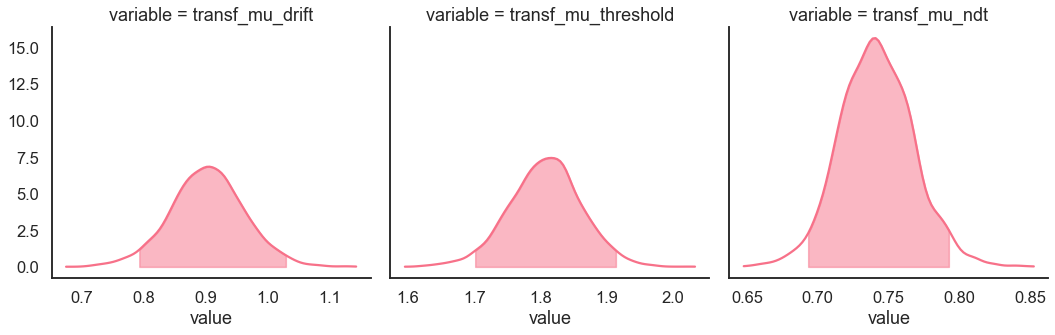

In [10]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

## Posterior predictives

### Ungrouped

In [11]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.833075,1.465869,1.924414,0.883730,1.093301,1.272597,1.568961,2.198967,0.941062,1.119104,1.321842,1.611800,2.195939
2,0.836170,1.463162,2.103788,0.892418,1.078721,1.299354,1.572111,2.172324,0.931466,1.112196,1.298555,1.591849,2.215945
3,0.846999,1.483644,2.208010,0.905064,1.090908,1.315067,1.576960,2.248927,0.940345,1.116395,1.311158,1.604061,2.271693
4,0.814047,1.484810,2.045138,0.923073,1.095670,1.295465,1.581610,2.274091,0.947493,1.129157,1.314156,1.610896,2.241961
5,0.837407,1.465835,2.270638,0.922109,1.093109,1.314665,1.643438,2.282154,0.937676,1.112792,1.289724,1.571149,2.203733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.829517,1.469527,2.031207,0.921734,1.093067,1.290120,1.542060,2.201835,0.940105,1.114216,1.305271,1.599589,2.227620
97,0.834004,1.482221,2.272835,0.884389,1.096907,1.286055,1.565813,2.301758,0.940277,1.119118,1.309424,1.595480,2.277529
98,0.825959,1.478508,2.217464,0.900590,1.089122,1.268247,1.549817,2.153399,0.941824,1.118637,1.309469,1.600631,2.277239


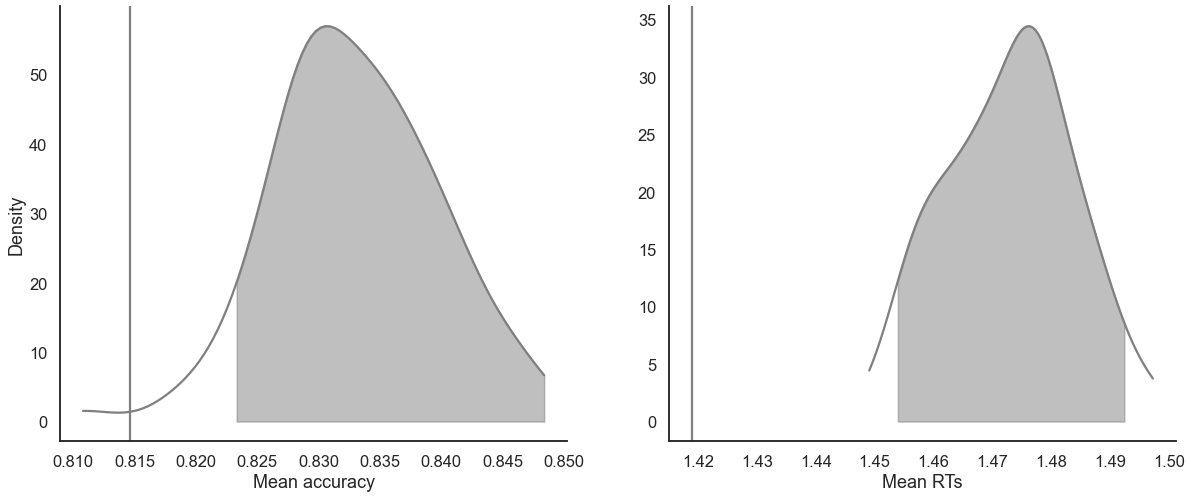

In [12]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

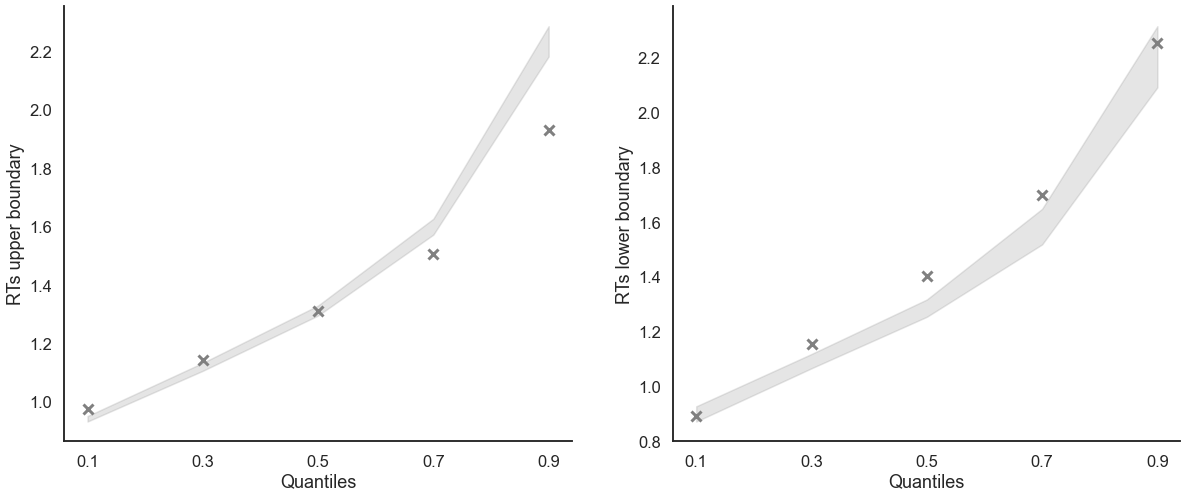

In [13]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [14]:
import numpy as np

In [15]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [16]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1            0.836127  1.424913  1.829896   
                        2            0.810056  1.489926  3.021606   
                        3            0.834264  1.522572  1.795817   
                        4            0.826816  1.504265  2.000594   
                        5            0.856611  1.455028  2.136628   
...                                       ...       ...       ...   
3           CD          96           0.822222  1.508209  1.729570   
                        97           0.829630  1.469977  1.739914   
                        98           0.838889  1.519894  1.752790   
                        99           0.844444  1.462611  1.526917   
                        100          0.838889  1.442204  2.094030   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.132202        1.090361   
                        2              1.085730        1.115178   
                        3              1.114961        1.123546   
                        4              1.127252        1.137665   
                        5              1.016709        1.092805   
...                                         ...             ...   
3           CD          96             1.070761        1.113506   
                        97             1.114338        1.112565   
                        98             1.191110        1.155950   
                        99             1.011587        1.141000   
                        100            1.070715        1.115111   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.302380        1.287831   
                        2              1.290275        1.313489   
                        3              1.348158        1.338346   
                        4              1.289395        1.347707   
                        5              1.266724        1.297497   
...                                         ...             ...   
3           CD          96             1.194467        1.393401   
                        97             1.333333        1.292743   
                        98             1.393306        1.349036   
                        99             1.217973        1.333668   
                        100            1.201510        1.322007   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1              1.640282        1.555307  
                        2              1.660278        1.574471  
                        3              1.773007        1.607617  
                        4              1.620425        1.639692  
                        5              1.535460        1.598402  
...                                         ...             ...  
3           CD          96             1.542280        1.692783  
                        97             1.630972        1.608350  
                        98             1.715621        1.666124  
                        99             1.496050        1.607953  
                        100            1.432134        1.583041  

[1200 rows x 9 columns]

In [ ]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

In [ ]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

In [ ]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                        grouping_var='choice_pair',
                                                        kind='shades',
                                                        quantiles=[.1, .3, .5, .7, .9]);